### Titanic Dataset Analysis for Kaggle

In [1]:
import pandas as pd
#hints: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Import Plotters
import seaborn as sns
import matplotlib.pyplot as plt

# Import CV tools
#http://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split

## Helper Functions

In [461]:
def plot_subplots(feature, data=full2):
    fx, axes = plt.subplots(2,1,figsize=(15,10))
    axes[0].set_title(f"{feature} vs Frequency")
    axes[1].set_title(f"{feature} vs Survival")
    fig_title1 = sns.countplot(data = data, x=feature, ax=axes[0])
    fig_title2 = sns.barplot(data = data, x=feature, y='Survived', ax=axes[1])
    
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))


Get Titanic DataSet

In [4]:
# get titanic & test csv files as a DataFrame
# train csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv
# test csv: https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv
train = pd.read_csv('https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/train.csv')
test = pd.read_csv('https://storage.googleapis.com/bwdb/acceleratehk/10%20-%20kaggle%20class/test.csv')

full = train.append(test, sort=False)

titanic = full.iloc[0:891,:]
full.shape

(1309, 12)

In [5]:
titanic.shape

(891, 12)

In [6]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Is Jack or Rose on the titanic?!

In [8]:
Most_important_people_on_titanic = ['Jack Dawson',  "Rose DeWitt Bukater"]
#Let's check if they are on Titanic?

In [9]:
'Rose' in 'Rose Dewitt Bukater'

True

In [10]:
bool_list = ["Rose" in x for x in full.Name]

In [11]:
Rose_list = pd.Series(bool_list)

Need to pass a Series object to full.Name to check for Roses and Jacks

In [12]:
full.Name[Rose_list]

855    Aks, Mrs. Sam (Leah Rosen)
Name: Name, dtype: object

In [13]:
full.Name[pd.Series(["Jack" in x for x in full.Name])]

766    Brewe, Dr. Arthur Jackson
Name: Name, dtype: object

**VARIABLE DESCRIPTIONS:**

We've got a sense of our variables, their class type, and the first few observations of each. We know we're working with 1309 observations of 12 variables. To make things a bit more explicit since a couple of the variable names aren't 100% illuminating, here's what we've got to deal with:


**Variable Description**

 - Survived: Survived (1) or died (0)
 - Pclass: Passenger's class
 - Name: Passenger's name - includes Title of Mr/Miss/Captain etc.
 - Sex: Passenger's sex
 - Age: Passenger's age
 - SibSp: Number of siblings/spouses aboard
 - Parch: Number of parents/children aboard
 - Ticket: Ticket number
 - Fare: Fare
 - Cabin: Cabin
 - Embarked: Port of embarkation

[More information on the Kaggle site](https://www.kaggle.com/c/titanic/data)

Look at the datatypes involved

In [14]:
full.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Plot correlation map

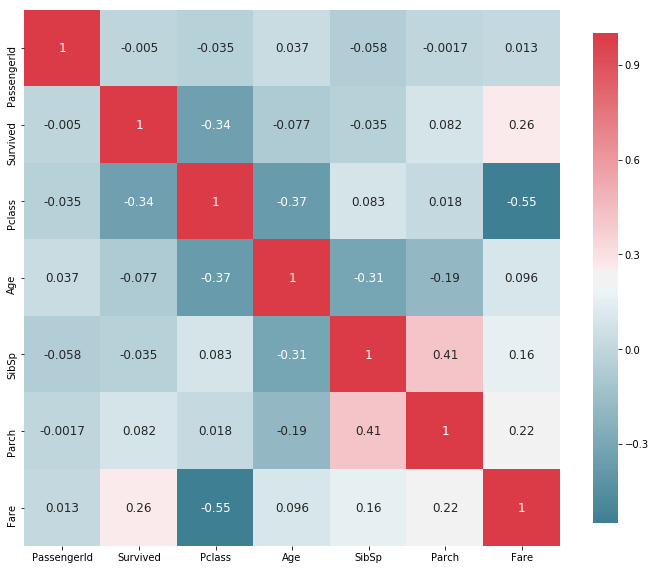

In [15]:
plot_correlation_map(titanic)

### Let's look at some of the categorical variables like Age and Gender

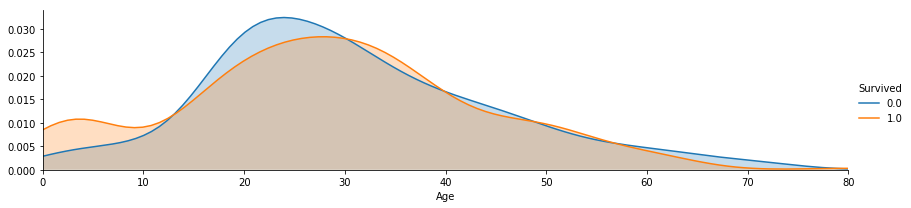

In [16]:
plot_distribution(titanic, "Age", "Survived")

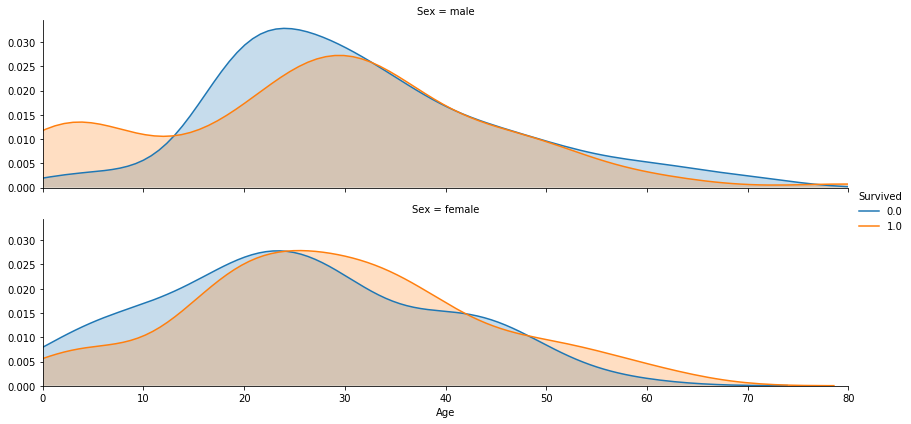

In [19]:
plot_distribution(titanic, "Age", "Survived", row="Sex")

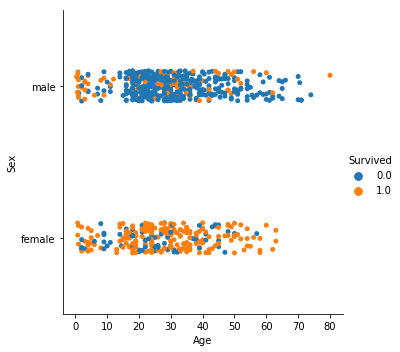

In [18]:
sns.catplot(x="Age", y="Sex", hue="Survived", data=titanic)

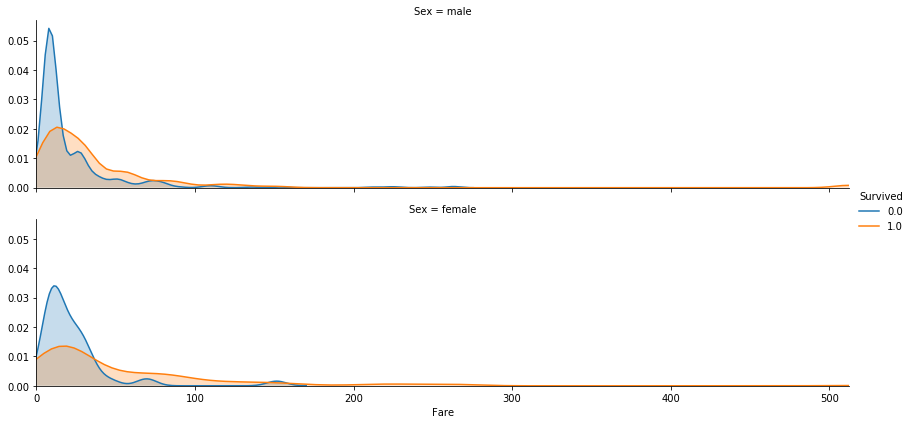

In [21]:
plot_distribution(titanic, "Fare", "Survived", row="Sex")

C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


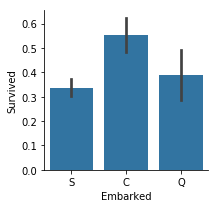

In [23]:
plot_categories(titanic, 'Embarked', 'Survived')

C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


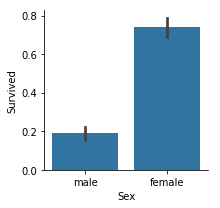

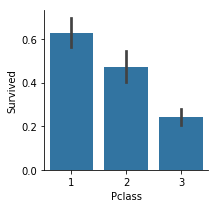

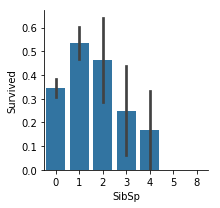

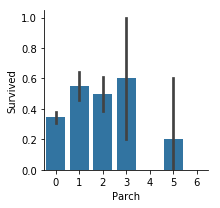

In [24]:
for x in ["Sex", "Pclass", "SibSp", "Parch"]:
    plot_categories(titanic, x, 'Survived')

##### Clearly, Gender, PassengerClass, and FamilySize have some predictive power on Surival. Let's polish up the data into categories and encode with One Hot encoding.

In [28]:
titanic.Age[titanic.Age < 10].count()

62

In [29]:
sex = pd.get_dummies(full.Sex)

In [32]:
sex.describe()

,female,male
count,1309.000000,1309.000000
mean,0.355997,0.644003
std,0.478997,0.478997
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [31]:
Embarked = pd.get_dummies(full.Embarked)

In [33]:
pclass = pd.get_dummies(full.Pclass)

In [34]:
pclass

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


Use imputer to impute Age (note that SimpleImputer is used in the newer versions)

In [35]:
imputed = pd.DataFrame()

In [53]:
full[["Age","Fare"]]

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,NaN,8.4583
6,54.0,51.8625
7,2.0,21.0750
8,27.0,11.1333
9,14.0,30.0708


In [43]:
def impute_variable(variable, dataset):
    imputer = Imputer()
    return imputer.fit_transform(dataset[variable].values, )

In [54]:
age_imputed = impute_variable(["Age", "Fare"], full)

In [55]:
age_imputed

array([[22.        ,  7.25      ],
       [38.        , 71.2833    ],
       [26.        ,  7.925     ],
       ...,
       [38.5       ,  7.25      ],
       [29.88113767,  8.05      ],
       [29.88113767, 22.3583    ]])

In [61]:
full["Age_imputed"] = age_imputed[:,0]

In [62]:
full["Fare_imputed"] = age_imputed[:,1]

In [63]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_imputed,Fare_imputed
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,29.881138,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,12.883193,51.738879
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.170000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,22.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.881138,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,35.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,80.000000,512.329200


In [64]:
full.isnull().sum()

PassengerId        0
Survived         418
Pclass             0
Name               0
Sex                0
Age              263
SibSp              0
Parch              0
Ticket             0
Fare               1
Cabin           1014
Embarked           2
Age_imputed        0
Fare_imputed       0
dtype: int64

##### Work on the Title category in Name - seems very predictive!

In [65]:
full['Title'] = full['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split()[0])

In [66]:
full.Title

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
5          Mr.
6          Mr.
7      Master.
8         Mrs.
9         Mrs.
10       Miss.
11       Miss.
12         Mr.
13         Mr.
14       Miss.
15        Mrs.
16     Master.
17         Mr.
18        Mrs.
19        Mrs.
20         Mr.
21         Mr.
22       Miss.
23         Mr.
24       Miss.
25        Mrs.
26         Mr.
27         Mr.
28       Miss.
29         Mr.
        ...   
388        Mr.
389    Master.
390        Mr.
391       Mrs.
392    Master.
393        Mr.
394        Mr.
395       Mrs.
396        Mr.
397       Mrs.
398        Mr.
399        Mr.
400      Miss.
401        Mr.
402      Miss.
403        Mr.
404        Mr.
405        Mr.
406        Mr.
407        Mr.
408      Miss.
409      Miss.
410      Miss.
411       Mrs.
412      Miss.
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Title, Length: 1309, dtype: object

In [462]:
Title_Dictionary = {
                    "Mme.":        "Mrs",
                    "Mlle.":       "Mrs",
                    "Ms.":         "Mrs",
                    "Mr." :        "Mr",
                    "Mrs." :       "Mrs",
                    "Miss." :      "Mrs",
                    }

In [92]:
Mapped_titles = full.Title.map(Title_Dictionary)

In [93]:
Mapped_titles.fillna("Rare", inplace=True)

In [94]:
full['Titles_mapped'] = Mapped_titles

In [95]:
full.Titles_mapped

0       Mr
1      Mrs
2      Mrs
3      Mrs
4       Mr
5       Mr
6       Mr
7      NaN
8      Mrs
9      Mrs
10     Mrs
11     Mrs
12      Mr
13      Mr
14     Mrs
15     Mrs
16     NaN
17      Mr
18     Mrs
19     Mrs
20      Mr
21      Mr
22     Mrs
23      Mr
24     Mrs
25     Mrs
26      Mr
27      Mr
28     Mrs
29      Mr
      ... 
388     Mr
389    NaN
390     Mr
391    Mrs
392    NaN
393     Mr
394     Mr
395    Mrs
396     Mr
397    Mrs
398     Mr
399     Mr
400    Mrs
401     Mr
402    Mrs
403     Mr
404     Mr
405     Mr
406     Mr
407     Mr
408    Mrs
409    Mrs
410    Mrs
411    Mrs
412    Mrs
413     Mr
414    NaN
415     Mr
416     Mr
417    NaN
Name: Title, Length: 1309, dtype: object

C:\Users\tcw\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


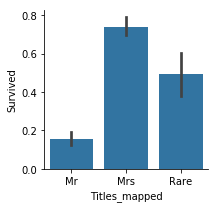

In [96]:
plot_categories(full, 'Titles_mapped', 'Survived')

In [97]:
full.isnull().sum()

PassengerId         0
Survived          418
Pclass              0
Name                0
Sex                 0
Age               263
SibSp               0
Parch               0
Ticket              0
Fare                1
Cabin            1014
Embarked            2
Age_imputed         0
Fare_imputed        0
Title               0
Titles_mapped       0
dtype: int64

In [98]:
cabin = pd.DataFrame()

In [99]:
cabin['Cabin'] = full.Cabin

In [112]:
cabin.Cabin.fillna("U", inplace=True)

In [113]:
import re

In [127]:
def findLetter(string):
    return re.match(r"[A-Z]{1}", string).group(0)

In [128]:
re.match(r"[A-Z]{1}", 'C23 C25 D27').group(0)

'C'

In [129]:
cabin.Cabin

0                U
1              C85
2                U
3             C123
4                U
5                U
6              E46
7                U
8                U
9                U
10              G6
11            C103
12               U
13               U
14               U
15               U
16               U
17               U
18               U
19               U
20               U
21             D56
22               U
23              A6
24               U
25               U
26               U
27     C23 C25 C27
28               U
29               U
          ...     
388              U
389              U
390            B24
391            D28
392              U
393              U
394              U
395            C31
396              U
397            B41
398              U
399              U
400             C7
401              U
402              U
403              U
404            D40
405            D38
406              U
407            C80
408              U
409         

In [130]:
cabin["Cabin_imputed"] = cabin.Cabin.apply(lambda x: findLetter(x))   

In [133]:
cabin.Cabin_imputed.describe()

count     1309
unique       9
top          U
freq      1014
Name: Cabin_imputed, dtype: object

In [136]:
cabin= pd.get_dummies(cabin.Cabin_imputed, prefix = 'Cabin')

In [153]:
cabin

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1


In [142]:
cabin.shape

(1309, 9)

In [170]:
full.index[1309]

0

In [173]:
full = full.iloc[:1309, :]

In [174]:
full.shape

(1309, 25)

In [183]:
full.drop(columns=full.iloc[:,3:12], inplace=True)

C:\Users\tcw\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [197]:
full2 = pd.concat([full, cabin], ignore_index=True, axis=1)

In [200]:
full2.columns

RangeIndex(start=0, stop=25, step=1)

In [203]:
newcolumns = full.columns.tolist() + cabin.columns.tolist()

In [204]:
newcolumns

['Age',
 'Age_imputed',
 'Cabin',
 'Embarked',
 'Fare',
 'Fare_imputed',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Ticket',
 'Title',
 'Titles_mapped',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Cabin_U']

In [205]:
full2.columns = newcolumns

In [207]:
full2.head()

,Age,Age_imputed,Cabin,Embarked,Fare,Fare_imputed,Name,Parch,PassengerId,Pclass,...,Titles_mapped,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,22.0,22.0,NaN,S,7.2500,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,...,Mr,0,0,0,0,0,0,0,0,1
1,38.0,38.0,C85,C,71.2833,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,...,Mrs,0,0,1,0,0,0,0,0,0
2,26.0,26.0,NaN,S,7.9250,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,...,Mrs,0,0,0,0,0,0,0,0,1
3,35.0,35.0,C123,S,53.1000,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,...,Mrs,0,0,1,0,0,0,0,0,0
4,35.0,35.0,NaN,S,8.0500,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,...,Mr,0,0,0,0,0,0,0,0,1


##### Work on the Ticket variable

In [208]:
Ticket = full.Ticket

In [210]:
Ticket.sample(10)

228                236171
378                  2648
28                 113054
250            C.A. 34651
234            C.A. 29566
654                365226
775                347078
84             SO/C 14885
251      SOTON/O2 3101284
159    SOTON/O.Q. 3101315
Name: Ticket, dtype: object

In [218]:
Ticket_split = [x.split(' ')[0] for x in Ticket]

In [219]:
Ticket_split = [x.replace(".", '') for x in Ticket_split]

In [221]:
Ticket_split = [x.replace("/", '') for x in Ticket_split]

In [222]:
Ticket_split

['A5',
 'PC',
 'STONO2',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP',
 '113783',
 'A5',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC',
 'PC',
 '335677',
 'CA',
 'PC',
 '113789',
 '2677',
 'A5',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SCParis',
 '330958',
 'SCA4',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A4',
 'PC',
 '2926',
 '113509',
 '19947',
 'CA',
 '2697',
 'CA',
 'CA',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC',
 '2661',
 'CA',
 'SP',
 '3101281',
 '315151',
 'CA',
 'CA',
 'SOC',
 '2680',
 '1601',
 '348123',
 '349208',
 '374746',
 '248738',
 '364516',
 '345767',
 '345779',
 '330932',
 '113059',
 'SOC',
 '3101278',
 'WC',
 'SOTONOQ',
 '19950',
 '343275',
 '343276',
 '347466',
 'WEP',
 'CA',
 '364500',
 '374910',
 'PC',
 'PC',
 '231919',
 '244367',
 '349245',
 '349215',
 '35281

In [223]:
full2["Ticket_imputed"] = Ticket_split

In [383]:
boollist = [x.isnumeric() for x in full2.Ticket_imputed]

In [385]:
full2.Ticket_imputed[boollist] = "XXX"

C:\Users\tcw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [387]:
full2.Ticket_imputed.describe()

count     1309
unique      37
top        XXX
freq       957
Name: Ticket_imputed, dtype: object

In [391]:
ticket = pd.get_dummies(full2.Ticket_imputed, prefix="Ticket")

In [392]:
ticket.head()

,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### Family Size

In [225]:
family = pd.DataFrame()

In [226]:
family["FamilySize"] = full.SibSp + full.Parch + 1

In [286]:
family.sample(10)

,FamilySize,FamilySizeCat
794,1.0,Family Size 0-1
868,1.0,Family Size 0-1
856,3.0,Family Size 2-4
555,1.0,Family Size 0-1
216,1.0,Family Size 0-1
218,1.0,Family Size 0-1
632,1.0,Family Size 0-1
758,1.0,Family Size 0-1
887,1.0,Family Size 0-1
320,1.0,Family Size 0-1


In [304]:
family['FamilySizeCategories'] = pd.cut(family.FamilySize, bins= [0,1,4,12], include_lowest=True, labels=["Family Size 0-1", "Family Size 2-4", "Family Size 4-12"])

In [305]:
family.FamilySizeCategories

0       Family Size 2-4
1       Family Size 2-4
2       Family Size 0-1
3       Family Size 2-4
4       Family Size 0-1
5       Family Size 0-1
6       Family Size 0-1
7      Family Size 4-12
8       Family Size 2-4
9       Family Size 2-4
10      Family Size 2-4
11      Family Size 0-1
12      Family Size 0-1
13     Family Size 4-12
14      Family Size 0-1
15      Family Size 0-1
16     Family Size 4-12
17      Family Size 0-1
18      Family Size 2-4
19      Family Size 0-1
20      Family Size 0-1
21      Family Size 0-1
22      Family Size 0-1
23      Family Size 0-1
24     Family Size 4-12
25     Family Size 4-12
26      Family Size 0-1
27     Family Size 4-12
28      Family Size 0-1
29      Family Size 0-1
             ...       
388     Family Size 0-1
389    Family Size 4-12
390     Family Size 0-1
391     Family Size 2-4
392     Family Size 2-4
393     Family Size 0-1
394    Family Size 4-12
395     Family Size 2-4
396     Family Size 0-1
397     Family Size 2-4
398     Family S

In [463]:
family.sample(10)

,FamilySize,FamilySizeCat,FamilySizeCategories
279,1.0,Family Size 0-1,Family Size 0-1
407,3.0,Family Size 2-4,Family Size 2-4
491,1.0,Family Size 0-1,Family Size 0-1
280,1.0,Family Size 0-1,Family Size 0-1
260,1.0,Family Size 0-1,Family Size 0-1
794,1.0,Family Size 0-1,Family Size 0-1
350,1.0,Family Size 0-1,Family Size 0-1
811,1.0,Family Size 0-1,Family Size 0-1
366,2.0,Family Size 2-4,Family Size 2-4
105,1.0,Family Size 0-1,Family Size 0-1


In [306]:
full2['FamilySizeCat'] = family.FamilySizeCategories

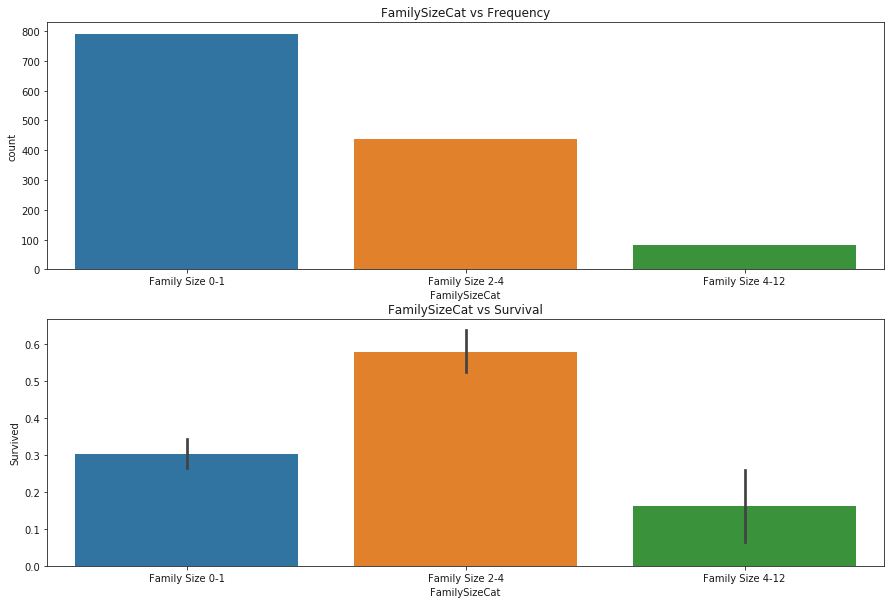

In [464]:
plot_subplots('FamilySizeCat')

In [309]:
full2.dtypes

Age                float64
Age_imputed        float64
Cabin               object
Embarked            object
Fare               float64
Fare_imputed       float64
Name                object
Parch              float64
PassengerId        float64
Pclass             float64
Sex                 object
SibSp              float64
Survived           float64
Ticket              object
Title               object
Titles_mapped       object
Cabin_A              uint8
Cabin_B              uint8
Cabin_C              uint8
Cabin_D              uint8
Cabin_E              uint8
Cabin_F              uint8
Cabin_G              uint8
Cabin_T              uint8
Cabin_U              uint8
Ticket_imputed      object
FamilySize        category
FamilySizeCat     category
dtype: object

In [312]:
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [313]:
pclass.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [314]:
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [345]:
sex.shape

(1309, 2)

In [362]:
full2.shape

(1309, 28)

Make sure the columns are properly named before concatenating (should have added prefix parameter during one-hot encoding)

In [371]:
pclass.rename({1:"Pclass1", 2:"Pclass2", 3:"Pclass3"}, axis=1, inplace=True)

In [372]:
Embarked.rename({'C':"Embarked_C", 'Q':"Embarked_Q", "S":"Embarked_S"}, axis=1, inplace=True)

In [373]:
fullfinal = pd.concat([full2, sex, pclass, Embarked], axis=1)

In [374]:
fullfinal.head()

,Age,Age_imputed,Cabin,Embarked,Fare,Fare_imputed,Name,Parch,PassengerId,Pclass,...,FamilySize,FamilySizeCat,female,male,Pclass1,Pclass2,Pclass3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,22.0,NaN,S,7.2500,7.2500,"Braund, Mr. Owen Harris",0.0,1.0,3.0,...,"(1.0, 4.0]",Family Size 2-4,0,1,0,0,1,0,0,1
1,38.0,38.0,C85,C,71.2833,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,2.0,1.0,...,"(1.0, 4.0]",Family Size 2-4,1,0,1,0,0,1,0,0
2,26.0,26.0,NaN,S,7.9250,7.9250,"Heikkinen, Miss. Laina",0.0,3.0,3.0,...,"(-0.001, 1.0]",Family Size 0-1,1,0,0,0,1,0,0,1
3,35.0,35.0,C123,S,53.1000,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,4.0,1.0,...,"(1.0, 4.0]",Family Size 2-4,1,0,1,0,0,0,0,1
4,35.0,35.0,NaN,S,8.0500,8.0500,"Allen, Mr. William Henry",0.0,5.0,3.0,...,"(-0.001, 1.0]",Family Size 0-1,0,1,0,0,1,0,0,1


In [375]:
fullfinal.dtypes

Age                float64
Age_imputed        float64
Cabin               object
Embarked            object
Fare               float64
Fare_imputed       float64
Name                object
Parch              float64
PassengerId        float64
Pclass             float64
Sex                 object
SibSp              float64
Survived           float64
Ticket              object
Title               object
Titles_mapped       object
Cabin_A              uint8
Cabin_B              uint8
Cabin_C              uint8
Cabin_D              uint8
Cabin_E              uint8
Cabin_F              uint8
Cabin_G              uint8
Cabin_T              uint8
Cabin_U              uint8
Ticket_imputed      object
FamilySize        category
FamilySizeCat     category
female               uint8
male                 uint8
Pclass1              uint8
Pclass2              uint8
Pclass3              uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
dtype: object

Cull unused columns

In [393]:
fullfinal.drop(columns=["Age", "Cabin", "Embarked", "Fare", "Parch", "Pclass", "Sex", "SibSp", "Survived", "Title", "Ticket"], inplace=True)

KeyError: "labels ['Age' 'Cabin' 'Embarked' 'Fare' 'Parch' 'Pclass' 'Sex' 'SibSp' 'Survived'\n 'Title' 'Ticket'] not contained in axis"

In [394]:
fullfinal.dtypes

Age_imputed        float64
Fare_imputed       float64
Name                object
PassengerId        float64
Titles_mapped       object
Cabin_A              uint8
Cabin_B              uint8
Cabin_C              uint8
Cabin_D              uint8
Cabin_E              uint8
Cabin_F              uint8
Cabin_G              uint8
Cabin_T              uint8
Cabin_U              uint8
Ticket_imputed      object
FamilySize        category
FamilySizeCat     category
female               uint8
male                 uint8
Pclass1              uint8
Pclass2              uint8
Pclass3              uint8
Embarked_C           uint8
Embarked_Q           uint8
Embarked_S           uint8
dtype: object

In [396]:
titles = pd.get_dummies(fullfinal.Titles_mapped, prefix="Title")

In [397]:
titles

,Title_Mr,Title_Mrs,Title_Rare
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,0,1,0
9,0,1,0


In [401]:
fullfinal.drop(columns=["Name", "Titles_mapped", "Ticket_imputed", "FamilySize"], inplace=True)

In [402]:
fullfinal2 = pd.concat([fullfinal, titles, ticket], axis=1)

In [404]:
FamCat = pd.get_dummies(fullfinal.FamilySizeCat)

In [406]:
FamCat

,Family Size 0-1,Family Size 2-4,Family Size 4-12
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,1,0,0
5,1,0,0
6,1,0,0
7,0,0,1
8,0,1,0
9,0,1,0


In [407]:
fullfinal2 = pd.concat([fullfinal2, FamCat], axis=1)

In [465]:
fullfinal2.columns

Index(['Age_imputed', 'Fare_imputed', 'PassengerId', 'Cabin_A', 'Cabin_B',
       'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T',
       'Cabin_U', 'female', 'male', 'Pclass1', 'Pclass2', 'Pclass3',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON',
       'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP',
       'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO',
       'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC',
       'Ticket_WEP', 'Ticket_XXX', 'Family Size 0-1', 'Family Size 2-4',
       'Family Size 4-12'],
      dtype='object')

In [410]:
fullfinal2.drop(columns="FamilySizeCat", inplace=True)

In [414]:
fullfinal2.isnull().sum()

Age_imputed         0
Fare_imputed        0
PassengerId         0
Cabin_A             0
Cabin_B             0
Cabin_C             0
Cabin_D             0
Cabin_E             0
Cabin_F             0
Cabin_G             0
Cabin_T             0
Cabin_U             0
female              0
male                0
Pclass1             0
Pclass2             0
Pclass3             0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Title_Mr            0
Title_Mrs           0
Title_Rare          0
Ticket_A            0
Ticket_A4           0
Ticket_A5           0
Ticket_AQ3          0
Ticket_AQ4          0
Ticket_AS           0
Ticket_C            0
                   ..
Ticket_FCC          0
Ticket_Fa           0
Ticket_LINE         0
Ticket_LP           0
Ticket_PC           0
Ticket_PP           0
Ticket_PPP          0
Ticket_SC           0
Ticket_SCA3         0
Ticket_SCA4         0
Ticket_SCAH         0
Ticket_SCOW         0
Ticket_SCPARIS      0
Ticket_SCParis      0
Ticket_SOC

In [415]:
fullfinal2.iloc[:891,:]

,Age_imputed,Fare_imputed,PassengerId,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Family Size 0-1,Family Size 2-4,Family Size 4-12
0,22.000000,7.2500,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,38.000000,71.2833,2.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,26.000000,7.9250,3.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,35.000000,53.1000,4.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,35.000000,8.0500,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,29.881138,8.4583,6.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,54.000000,51.8625,7.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
7,2.000000,21.0750,8.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8,27.000000,11.1333,9.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
9,14.000000,30.0708,10.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##### Time to do train/test split!

In [425]:
train_valid_X = fullfinal2.iloc[:891,:]
train_valid_y = titanic.Survived
test_X = fullfinal2.iloc[891:,:]


In [426]:
train_X, valid_X, train_y, valid_y = train_test_split( train_valid_X, train_valid_y, train_size=.7)

C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [427]:
print (fullfinal2.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 63) (623, 63) (268, 63) (623,) (268,) (418, 63)


##### Function to compare and plot classifier performance

C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tcw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\tcw\Anaconda3\lib\site-packages\s

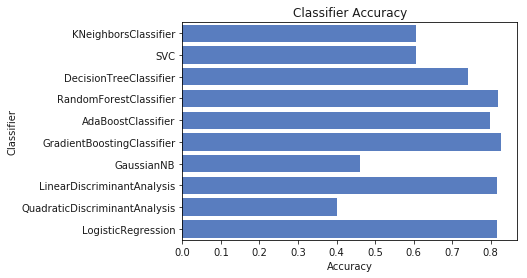

In [431]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train_valid_x.values
y = train_valid_y

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

In [433]:
candidate_classifier = GradientBoostingClassifier()
candidate_classifier.fit(train_valid_X, train_valid_y)
result = candidate_classifier.predict(test_X)

In [434]:
result

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [437]:
result = result.astype(int)

In [438]:
pred = pd.DataFrame((result))

In [441]:
test_X

,Age_imputed,Fare_imputed,PassengerId,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,...,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,Family Size 0-1,Family Size 2-4,Family Size 4-12
0,34.500000,7.8292,892.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,47.000000,7.0000,893.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,62.000000,9.6875,894.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,27.000000,8.6625,895.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,22.000000,12.2875,896.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,14.000000,9.2250,897.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,30.000000,7.6292,898.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,26.000000,29.0000,899.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,18.000000,7.2292,900.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
9,21.000000,24.1500,901.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


##### Submit your data in csv format - values have to be integers

In [457]:
Ids = [int(x) for x in test_X.PassengerId]

In [458]:
def Titan_submit(pred, filename):
    my_submission = pd.DataFrame({'PassengerId': Ids, 'Survived':pred})
    my_submission.to_csv(filename, index=False)

In [459]:
Titan_submit(result, 'TitanicGradBoost2.csv')